# Traffic Detection with YOLOv5
The pretrained model was taken from https://pytorch.org/hub/ultralytics_yolov5/. Since YOLOv5, the licensing has changed. More details can be found here https://github.com/ultralytics/yolov5.

Essentially we take the video frame by frame and pass each frame through YOLOv5. We plot the bounding boxes that result from it.

## Load Model

In [1]:
import torch
import torch.hub
import cv2
import os
import matplotlib.pyplot as plt
import time

In [35]:
# Model
model_name = "yolov5x6"
model_path = os.path.expanduser(f"~/Developer/Models/{model_name}.pt")
print("Loading...")
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model = torch.hub.load(
    repo_or_dir="../../../../.cache/torch/hub/ultralytics_yolov5_master",
    model=model_name,
    pretrained=True,
    force_reload=True,
    source="local",
)
print("Loaded")


YOLOv5 🚀 2023-11-10 Python-3.11.5 torch-2.1.0+cu118 CPU



Loading...


ERROR: Remote end closed connection without response
Re-attempting https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5x6.pt to yolov5x6.pt...
######################################################################## 100.0%%                        36.3%                               53.6%#######################                                  56.8%###                            64.6%###############               83.1%

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients, 209.6 GFLOPs
Adding AutoShape... 


Loaded


In [36]:
# Utils
# 91 Colors for 91 classes
colors = [
    "#000000",  # Black
    "#FF0000",  # Red
    "#00FF00",  # Lime
    "#0000FF",  # Blue
    "#FFFF00",  # Yellow
    "#00FFFF",  # Cyan / Aqua
    "#FF00FF",  # Magenta / Fuchsia
    "#C0C0C0",  # Silver
    "#808080",  # Gray
    "#800000",  # Maroon
    "#808000",  # Olive
    "#008000",  # Green
    "#800080",  # Purple
    "#008080",  # Teal
    "#000080",  # Navy
    "#FFA07A",  # Light Salmon
    "#FA8072",  # Salmon
    "#E9967A",  # Dark Salmon
    "#F08080",  # Light Coral
    "#CD5C5C",  # Indian Red
    "#DC143C",  # Crimson
    "#B22222",  # Fire Brick
    "#8B0000",  # Dark Red
    "#FF4500",  # Orange Red
    "#FF6347",  # Tomato
    "#FF7F50",  # Coral
    "#FF8C00",  # Dark Orange
    "#FFA500",  # Orange
    "#FFD700",  # Gold
    "#FFFFE0",  # Light Yellow
    "#FFFACD",  # Lemon Chiffon
    "#FAFAD2",  # Light Goldenrod Yellow
    "#FFE4B5",  # Moccasin
    "#FFDAB9",  # Peach Puff
    "#EEE8AA",  # Pale Goldenrod
    "#F0E68C",  # Khaki
    "#BDB76B",  # Dark Khaki
    "#FFFFF0",  # Ivory
    "#FFFAF0",  # Floral White
    "#F5FFFA",  # Mint Cream
    "#F0FFF0",  # Honeydew
    "#F5F5DC",  # Beige
    "#FAEBD7",  # Antique White
    "#D2B48C",  # Tan
    "#DEB887",  # Burlywood
    "#FFDEAD",  # Navajo White
    "#FFE4C4",  # Bisque
    "#FF8C00",  # Dark Orange
    "#D2691E",  # Chocolate
    "#8B4513",  # Saddle Brown
    "#A52A2A",  # Brown
    "#2E8B57",  # Sea Green
    "#3CB371",  # Medium Sea Green
    "#20B2AA",  # Light Sea Green
    "#98FB98",  # Pale Green
    "#00FF7F",  # Spring Green
    "#7FFF00",  # Chartreuse
    "#00FF00",  # Lime Green
    "#32CD32",  # Lime
    "#008000",  # Green
    "#006400",  # Dark Green
    "#00FA9A",  # Medium Spring Green
    "#90EE90",  # Light Green
    "#7CFC00",  # Lawn Green
    "#00FF00",  # Green Yellow
    "#ADFF2F",  # Green Yellow
    "#556B2F",  # Dark Olive Green
    "#228B22",  # Forest Green
    "#008B8B",  # Dark Cyan
    "#20B2AA",  # Light Sea Green
    "#48D1CC",  # Medium Turquoise
    "#40E0D0",  # Turquoise
    "#00CED1",  # Dark Turquoise
    "#AFEEEE",  # Pale Turquoise
    "#E0FFFF",  # Light Cyan
    "#00FFFF",  # Aqua / Cyan
    "#5F9EA0",  # Cadet Blue
    "#4682B4",  # Steel Blue
    "#B0C4DE",  # Light Steel Blue
    "#ADD8E6",  # Light Blue
    "#87CEEB",  # Sky Blue
    "#87CEFA",  # Light Sky Blue
    "#00BFFF",  # Deep Sky Blue
    "#1E90FF",  # Dodger Blue
    "#6495ED",  # Cornflower Blue
    "#7B68EE",  # Medium Slate Blue
    "#4169E1",  # Royal Blue
    "#0000FF",  # Blue
    "#0000CD",  # Medium Blue
    "#00008B",  # Dark Blue
    "#000080",  # Navy
    "#191970",  # Midnight Blue
]

## Inference
Let's begin by making inference on a single image.

In [37]:
# Images
img = cv2.imread('frame.png')
print(img.shape)

# Inference
model.eval()
results = model(img)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
bboxes = results.pandas().xyxy[0]  # img1 predictions (pandas)
print(bboxes.head(5))

(720, 1280, 3)


image 1/1: 720x1280 17 persons, 9 cars, 16 motorcycles, 1 truck, 1 traffic light, 1 tv
Speed: 4.9ms pre-process, 233.1ms inference, 1.3ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to runs/detect/exp4


         xmin        ymin         xmax        ymax  confidence  class name
0  551.299377  360.881805   636.672791  416.899139    0.900688      2  car
1  877.267822  235.020386   906.583008  260.294922    0.784973      2  car
2  735.001099  256.317841   781.062866  292.439240    0.778801      2  car
3  851.422302  217.873108   883.270813  245.169373    0.751238      2  car
4  983.037109   25.344543  1087.491455  100.284332    0.745342     62   tv


Let's draw out the bounding boxes.

In [38]:

# Draw bounding boxes and labels of detections
def draw_bounding_boxes(img, bboxes):
    for *xyxy, conf, cls in bboxes:
        label = f'{model.names[int(cls)]} {conf:.2f}'
        # print(xyxy, label)
        # add bbox to the image
        
        # cv2.rectangle(imgs, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (255, 0, 0), 2)
        # add label to the image
        # cv2.putText(image, text, text_position, font, font_size, font_color, font_thickness)
        font = cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText = (int(xyxy[0]), int(xyxy[1]))
        fontScale = 0.2
        color = colors[int(cls)]
        color = tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))
        fontColor = color
        fontThickness = 1
        cv2.rectangle(img, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), fontColor, 2)
        cv2.putText(img, label, bottomLeftCornerOfText, font, fontScale, fontColor, fontThickness)    
    # cv2.putText(imgs, label, (int(xyxy[0]), int(xyxy[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    return img


img = draw_bounding_boxes(img, results.xyxy[0])

# save the image
cv2.imwrite("result.png", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


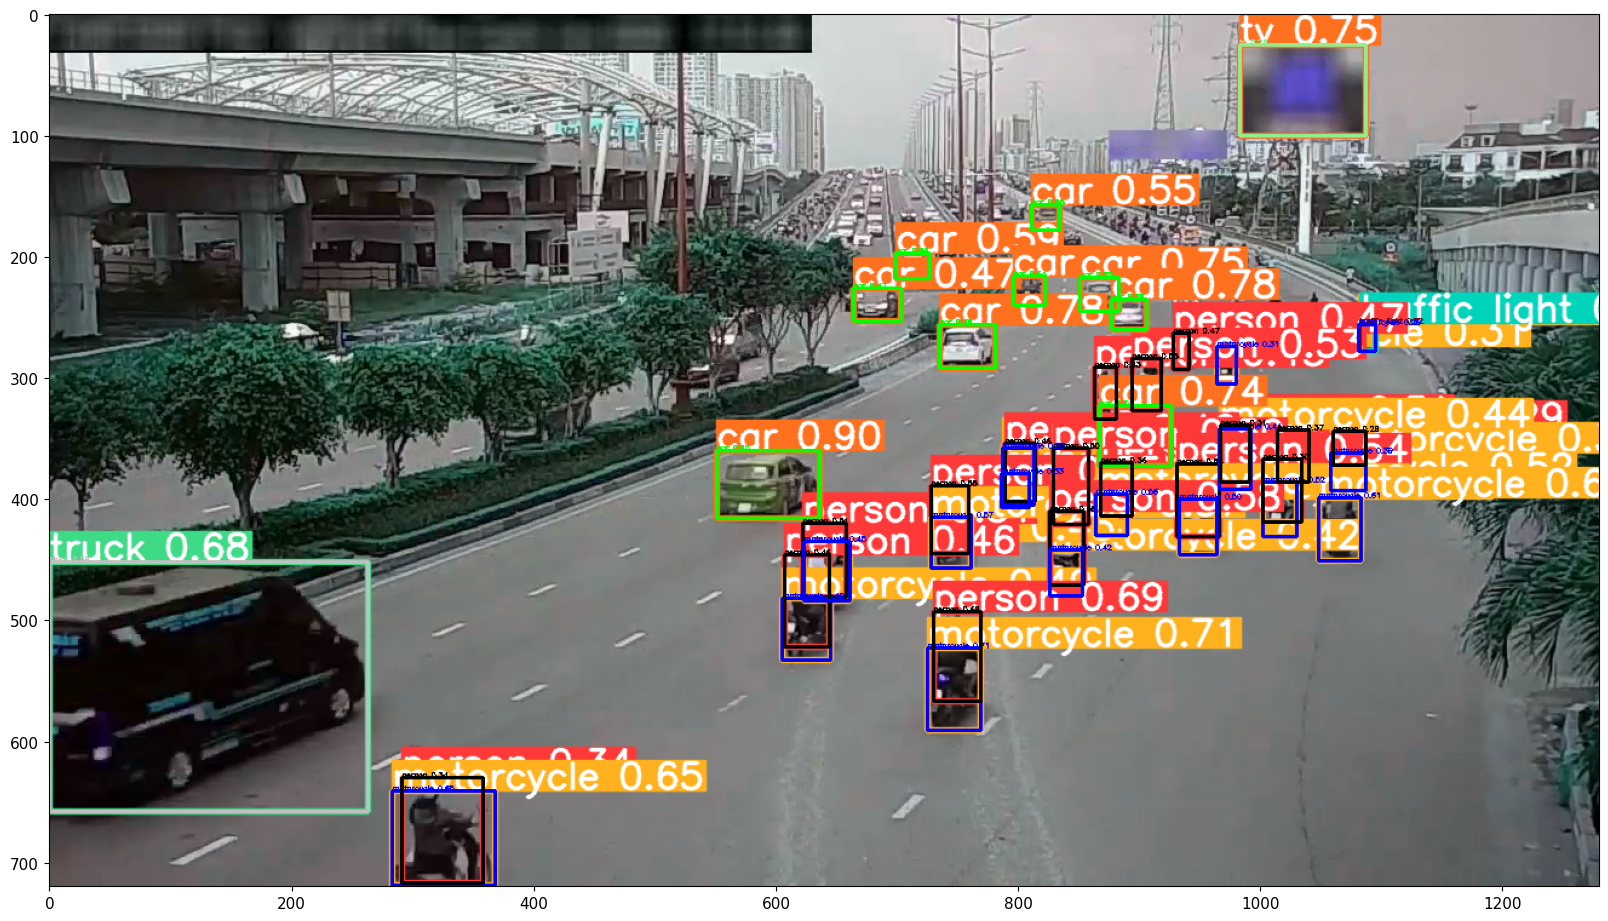

<Figure size 640x480 with 0 Axes>

In [39]:
%matplotlib inline
img = cv2.imread("result.png")
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()
plt.clf()


Now let's do this for the entire video. We note the average time it takes per inference.

In [40]:
# Do it in a loop
video_path = '../../data/traffic.mp4'
cap = cv2.VideoCapture(video_path)
height, width, fps, count, framespn = cap.get(cv2.CAP_PROP_FRAME_HEIGHT), cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FPS), cap.get(cv2.CAP_PROP_FRAME_COUNT), cap.get(cv2.CAP_PROP_POS_FRAMES)
print(height, width, fps, count, framespn)

total_time = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    frame_number = cap.get(cv2.CAP_PROP_POS_FRAMES)
    
    # Only run inference every 10 frames
    # if int(frame_number) % 3 != 0:
    #     continue
    if ret == True:
        # Inference
        start_time = time.time()
        output = model(frame)
        end_time = time.time()
        # print(f"inference time for frame {frame_number} is {end_time - start_time}")
        total_time += (end_time - start_time)
        bboxes = output.xyxy[0]
        # Draw bounding boxes and labels of detections
        result_img = draw_bounding_boxes(frame, bboxes)
        
        # if int(frame_number) in [99, 198, 297]:
        if True:
            cv2.imwrite(f"./Data/video/{model_name}_frame_{int(frame_number)}.png", result_img)
            
        if cv2.waitKey(1) & 0xFF == ord('q'): # press q to quit
            break
    else:
        print("Video ended")
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

print(f"Total inference time: {total_time}")
print(f"Aeverage inference time: {total_time / count}")

720.0 1280.0 30.0 885.0 0.0
Video ended
Total inference time: 189.83357524871826
Aeverage inference time: 0.2145012149703031


In [21]:
# Make video from files

# Combine the saved frames into a single image
image_folder = './Data/video/'

# Make sure the images are named in order (e.g., image001.jpg, image002.jpg, etc.)
# You can use functions like os.listdir() to list the image files and sort them.
images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
if len(images) == 0:
    print("No images found")
    exit()


# sort images by frame number, remove the .png
images = sorted(images, key=lambda x: int(x.split("_")[-1].split(".")[0]))
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

# Define the video file name and codec
video_name = 'output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  
video = cv2.VideoWriter(video_name, fourcc, 30, (width, height))  # Adjust the frame rate (in this case, 1 frame per second)

for image in images:
    img_path = os.path.join(image_folder, image)
    # print(img_path)
    frame = cv2.imread(img_path)
    video.write(frame)

cv2.destroyAllWindows()
video.release()

print("Done")

Done


## Results

### YOLOv5s
For the model `yolov5s`, we recorded an average inference time of

This is much faster than pytorch's [fasterrcnn_mobilenet_v3_large_320_fpn](https://pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn.html#torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn) model, about 5x faster, while being more accurate. For example, the images recorded at frame 99 and 198.

Frame 99
| Yolov5s | Fastercnn |
| ------- | --------- |
| ![](./Data/yolov5s_frame_99.png)       | ![](./Data/fasterrcnn_mobilenet_v3_large_320_fpn_frame_99_t0.2.png) |

Frame 198
| Yolov5s | Fastercnn |
| ------- | --------- |
| ![](./Data/yolov5s_frame_198.png)       | ![](./Data/fasterrcnn_mobilenet_v3_large_320_fpn_frame_198_t0.2.png) |

Compared to [fasterrcnn_resnet50_fpn](https://pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn.html#torchvision.models.detection.fasterrcnn_resnet50_fpn), however, the accuracy was a lot lower. [fasterrcnn_resnet50_fpn](https://pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn.html#torchvision.models.detection.fasterrcnn_resnet50_fpn) faired better when detecting far away objects, especially the cars in the top left.

Let's do some comparisons

Frame 99
| Yolov5s | Fastercnn |
| ------- | --------- |
| ![](./Data/yolov5s_frame_99.png)       | ![](./Data/fasterrcnn_resnet50_fpn_frame_99_t0.0.png) |

Frame 198
| Yolov5s | Fastercnn |
| ------- | --------- |
| ![](./Data//yolov5s_frame_198.png)       | ![](./Data/fasterrcnn_resnet50_fpn_frame_198_t0.0.png) |


### YOLOv5x
Here, I use a larger version, it is supposed to higher accuracy but decreased speed compared to YOLOv5s. We do see these results, we can see smaller objects as well as cars on the other side of the road, even if partially blocked. 

However, the speed reduces to about 0.17ms per frame. This is about 4x slower than YOLOv5s version.

Frame 99
| Yolov5x | Fastercnn |
| ------- | --------- |
| ![](./Data/yolov5x_frame_99.png)       | ![](./Data/fasterrcnn_resnet50_fpn_frame_99_t0.0.png) |

Frame 198
| Yolov5x | Fastercnn |
| ------- | --------- |
| ![](./Data//yolov5x_frame_198.png)       | ![](./Data/fasterrcnn_resnet50_fpn_frame_198_t0.0.png) |


Frame 297
| Yolov5x | Fastercnn |
| ------- | --------- |
| ![](./Data//yolov5x_frame_297.png)       | ![](./Data/fasterrcnn_resnet50_fpn_frame_297_t0.0.png) |


### YOLOv5x6
Let's try the biggest model. Average inference increases to 0.21ms. This is about the same speed as the worst(accuracy wise) faster-rcnn by pytorch.

Frame 99
| Yolov5x6 | Fastercnn |
| ------- | --------- |
| ![](./Data/yolov5x6_frame_98.png)       | ![](./Data/fasterrcnn_resnet50_fpn_frame_99_t0.0.png) |

Frame 198
| Yolov5x6 | Fastercnn |
| ------- | --------- |
| ![](./Data//yolov5x6_frame_198.png)       | ![](./Data/fasterrcnn_resnet50_fpn_frame_198_t0.0.png) |


Frame 297
| Yolov5x6 | Fastercnn |
| ------- | --------- |
| ![](./Data//yolov5x6_frame_297.png)       | ![](./Data/fasterrcnn_resnet50_fpn_frame_297_t0.0.png) |


However, looking at the results, this model didn't see to be able to have better results.